# Import the Libraries

In [115]:
import pandas as pd
import numpy as np
import yaml
import os
import cv2
import matplotlib
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
%matplotlib inline
from sortedcontainers import SortedDict


# Load yaml file

In [208]:

with open('Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/data.yaml', 'r') as f:
    doc = yaml.load(f, Loader=yaml.FullLoader)

In [7]:
doc

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 4,
 'names': ['ballooning', 'fibrosis', 'inflammation', 'steatosis'],
 'roboflow': {'workspace': 'roboflow-100',
  'project': 'liver-disease',
  'version': 2,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/roboflow-100/liver-disease/dataset/2'}}

# Load the Image Dataset

In [209]:
# defining the directory of the images
image_dir = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/images'
txt_dir = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels'

# making a list of images
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
txt_files = [os.path.join(txt_dir, txt) for txt in os.listdir(txt_dir) if txt.endswith(('.txt'))]

classes = [0, 1, 2, 3]
images = {}
txts = {}
for index, txt in enumerate(txt_files):
    data = np.loadtxt(txt)

    if data.size == 0:
        continue

    if data.ndim == 1:
        data = data.reshape(-1, 1)

    if int(data[0, 0]) in classes and int(data[0, 0]) not in images:
        images[int(data[0, 0])] = image_files[index]
        txts[int(data[0, 0])] = txt_files[index]



    if len(images) == 4:
        break




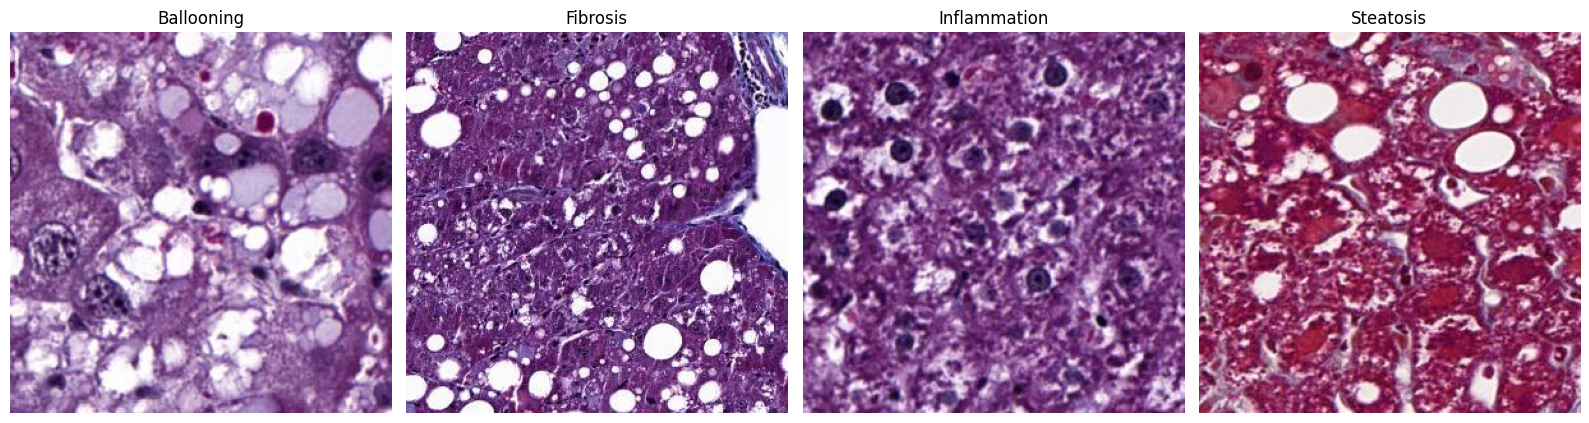

In [210]:
images_sorted = SortedDict(images)
txts_sorted = SortedDict(txts)
names = {0:'Ballooning', 1:'Fibrosis', 2:'Inflammation', 3:'Steatosis'}

plt.figure(figsize=(16, 6))

for index, (keys, values) in enumerate(images_sorted.items()):
    plt.subplot(1, 4, index+1)
        
    img = cv2.imread(values)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{names[keys]}')


plt.tight_layout()
plt.show()
   






[149  91  96]
[136  66 129]
[99 28 94]
[188 153 193]


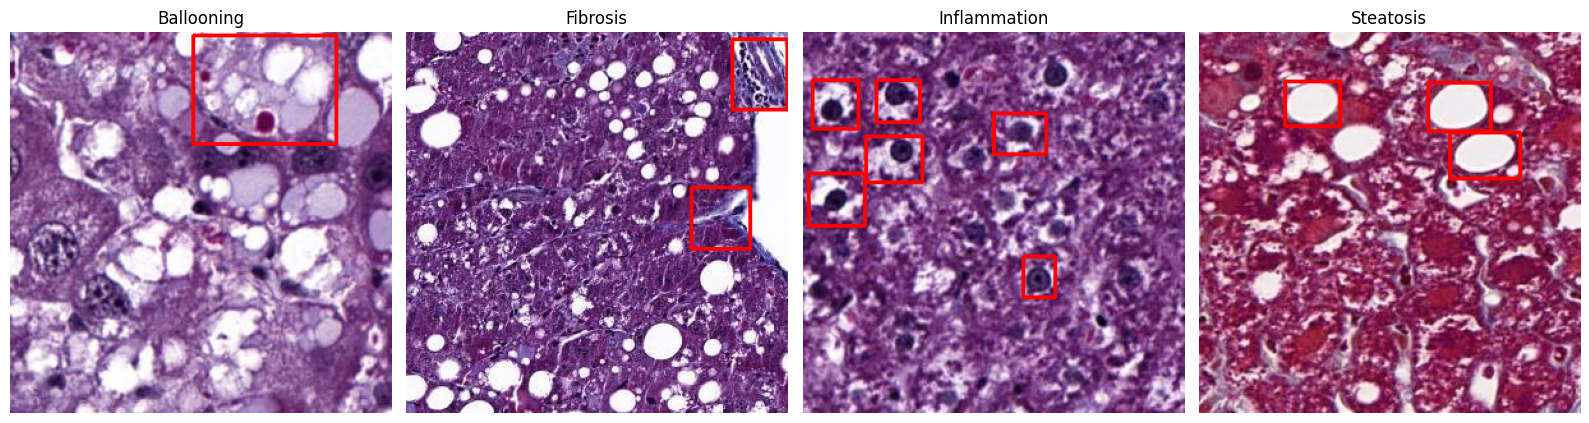

In [211]:

plt.figure(figsize=(16, 6))


for index, (keys, values) in enumerate(names.items()):
    
    plt.subplot(1, 4, index+1)
 
    image = cv2.imread(images_sorted[keys])
    print(image[0, 0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    txt = np.loadtxt(txts_sorted[keys])

    if txt.ndim == 1:
        txt = txt.reshape(1, -1)


    H, W, _ = image.shape # hight and width of image

    for i in range(len(txt)):
 

        x_center, y_center, width, height = map(float, txt[i, 1:])

        # Convert YOLO format to pixel coordinates
        x_min = int((x_center - width / 2) * W)
        y_min = int((y_center - height / 2) * H)
        x_max = int((x_center + width / 2) * W)
        y_max = int((y_center + height / 2) * H)

      

        # Draw the bounding box
        color = (255, 0, 0)  # Red color for the box (in RGB)
        thickness = 2
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

    # Display the image with bounding boxes
    
        plt.imshow(image)
        plt.axis("off")  # Hide axes
        plt.title(f'{values}')
plt.tight_layout()
plt.savefig('samples_diseases.png')


# Loading the Test and Validation Dataset

In [20]:
# directory of the test data
image_dir_test = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/test/images'
image_files_test = [os.path.join(image_dir_test, f_test) for f_test in os.listdir(image_dir_test) if f_test.endswith(('.png', '.jpg', '.jpeg'))  ]

# directory of the validation data
image_dir_valid = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/valid/images'
image_files_valid = [os.path.join(image_dir_valid, f_valid) for f_valid in os.listdir(image_dir_valid) if f_valid.endswith(('.jpg', '.png', '.jpeg'))]

# Explore the Dataset


## Number of Images

In [ ]:
print(f'the length of the training dataset: {len(image_files)}')
print(f'the length of the validation dataset: {len(image_files_valid)}')
print(f'the length of the test dataset: {len(image_files_test)}')


the length of the training dataset: 2782
the length of the validation dataset: 794
the length of the test dataset: 400


## Check the Size of Images

In [29]:
train_image_shapes = [cv2.imread(img).shape for img in image_files]

print(train_image_shapes[:5])

print(f'the shape of training images {np.unique_counts(train_image_shapes)}')

[(299, 299, 3), (299, 299, 3), (299, 299, 3), (299, 299, 3), (299, 299, 3)]
the shape of training images UniqueCountsResult(values=array([  3, 299]), counts=array([2782, 5564]))


In [30]:
test_images_shapes = [cv2.imread(img_test).shape for img_test in image_files_test]

print(f'{np.unique_counts(test_images_shapes)}')

valid_images_shape = [cv2.imread(img_valid).shape for img_valid in image_files_valid]

print(f'{np.unique_counts(valid_images_shape)}')

UniqueCountsResult(values=array([  3, 299]), counts=array([400, 800]))
UniqueCountsResult(values=array([  3, 299]), counts=array([ 794, 1588]))


# Check the Distribution of the Classes

/tmp/ipykernel_456/3855697120.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels/15_242_208_198_51_jpg.rf.c4740659433d31cf000bdac205734680.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipykernel_456/3855697120.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels/15_242_208_198_55_jpg.rf.01be5bed8cfc786a3b59a7f7596fcea0.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipykernel_456/3855697120.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels/15_242_208_198_58_jpg.rf.51dfa79420433f445aedbf8526402034.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipykernel_456/3855697120.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels/15_242_208_199_16_jpg.rf.c4856ba77de6049a4236c039c6203ab4.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipy

the number of images with no label: 8
distribution of the classes in training dataset: {0: 2157, 1: 944, 2: 1763, 3: 1985}


/tmp/ipykernel_456/3855697120.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels/306_3_8_4_jpg.rf.f47f607dc5180862b013ac51283f342e.txt"
  array_txt = np.loadtxt(txt)


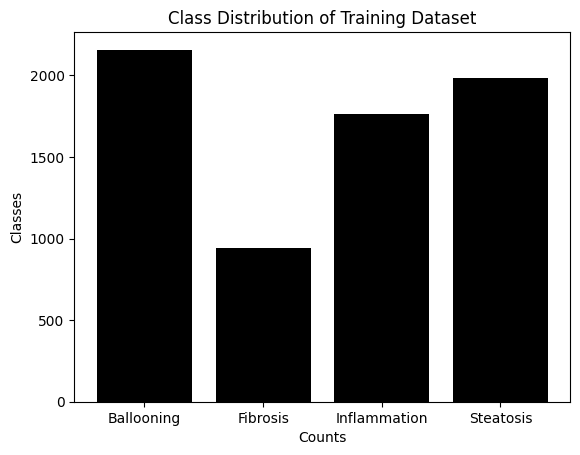

In [202]:
classes_train = {0:0, 
           1:0, 
           2:0, 
           3:0}


txt_dir_train = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/train/labels'

txt_file_train = [os.path.join(txt_dir_train, txt_train) for txt_train in os.listdir(txt_dir_train) if txt_train.endswith(('.txt'))]

no_label_train = 0
for txt in txt_file_train:
    array_txt = np.loadtxt(txt)
    
    # handle empty files
    if array_txt.size == 0:
        no_label_train += 1
        continue
    
    # when there is a single line in the file: converting 1D to 2D
    if array_txt.ndim == 1:
        array_txt = array_txt.reshape(-1, 1)

    value, counts = np.unique(array_txt[:, 0], return_counts=True)
    classes_train[int(value[0])] += int(counts[0])


print(f'the number of images with no label: {no_label_train}')

print(f'distribution of the classes in training dataset: {classes_train}')

classes_names = {0:'Ballooning', 1:'Fibrosis', 2:'Inflammation', 3:'Steatosis'}
names = [Name for Name in classes_names.values()]
# visualisation the class distribution
plt.bar(names, list(classes_train.values()), color='k')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.title('Class Distribution of Training Dataset')
plt.xticks(list(classes_train.keys()))
plt.savefig('TrainingDataset.png')

the number of images with no label: 0
distribution of the classes in training dataset: {0: 310, 1: 126, 2: 262, 3: 291}


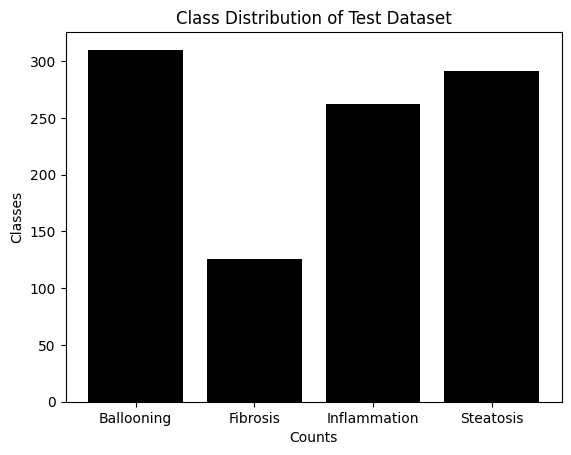

In [203]:
classes_test = {0:0, 
           1:0, 
           2:0, 
           3:0}


txt_dir_test = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/test/labels'

txt_file_test = [os.path.join(txt_dir_test, txt_test) for txt_test in os.listdir(txt_dir_test) if txt_test.endswith(('.txt'))]

no_label_test = 0
for txt in txt_file_test:
    array_txt = np.loadtxt(txt)
    
    # handle empty files
    if array_txt.size == 0:
        no_label_test += 1
        continue
    
    # when there is a single line in the file: converting 1D to 2D
    if array_txt.ndim == 1:
        array_txt = array_txt.reshape(-1, 1)

    value, counts = np.unique(array_txt[:, 0], return_counts=True)
    classes_test[int(value[0])] += int(counts[0])


print(f'the number of images with no label: {no_label_test}')

print(f'distribution of the classes in training dataset: {classes_test}')

classes_names = {0:'Ballooning', 1:'Fibrosis', 2:'Inflammation', 3:'Steatosis'}
names = [Name for Name in classes_names.values()]
# visualisation the class distribution
plt.bar(names, list(classes_test.values()), color='k')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.title('Class Distribution of Test Dataset')
plt.xticks(list(classes_test.keys()))
plt.savefig('TestDataset.png')

/tmp/ipykernel_456/167846383.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/valid/labels/15_242_208_198_46_jpg.rf.a4f6ede275df0afa1d8d668a8c5a61e6.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipykernel_456/167846383.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/valid/labels/15_242_208_198_57_jpg.rf.77729fff38e91320a0914d217cfd453e.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipykernel_456/167846383.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/valid/labels/15_242_208_199_15_jpg.rf.e1d516090637c95708b6108dff961217.txt"
  array_txt = np.loadtxt(txt)
/tmp/ipykernel_456/167846383.py:13: UserWarning: loadtxt: input contained no data: "Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/valid/labels/208_4_14_18_jpg.rf.714638c292c4e3cabd63359bd9469123.txt"
  array_txt = np.loadtxt(txt)


the number of images with no label: 4
distribution of the classes in training dataset: {0: 579, 1: 271, 2: 523, 3: 564}


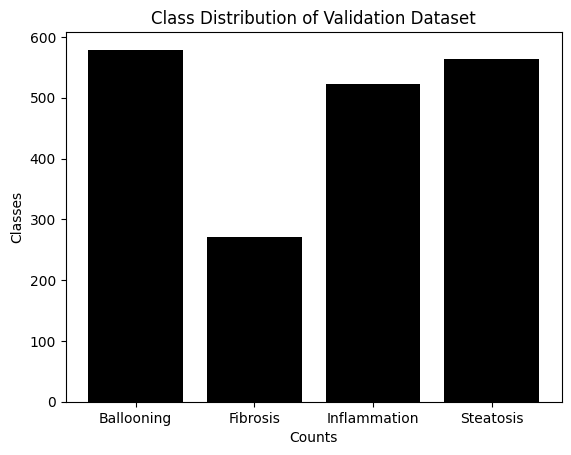

In [204]:
classes_valid = {0:0, 
           1:0, 
           2:0, 
           3:0}


txt_dir_valid = 'Dataset-ProjectII/liver disease.v2-release.yolov5pytorch/valid/labels'

txt_file_valid = [os.path.join(txt_dir_valid, txt_valid) for txt_valid in os.listdir(txt_dir_valid) if txt_valid.endswith(('.txt'))]

no_label_valid = 0
for txt in txt_file_valid:
    array_txt = np.loadtxt(txt)
    
    # handle empty files
    if array_txt.size == 0:
        no_label_valid += 1
        continue
    
    # when there is a single line in the file: converting 1D to 2D
    if array_txt.ndim == 1:
        array_txt = array_txt.reshape(-1, 1)

    value, counts = np.unique(array_txt[:, 0], return_counts=True)
    classes_valid[int(value[0])] += int(counts[0])


print(f'the number of images with no label: {no_label_valid}')

print(f'distribution of the classes in training dataset: {classes_valid}')



classes_names = {0:'Ballooning', 1:'Fibrosis', 2:'Inflammation', 3:'Steatosis'}
names = [Name for Name in classes_names.values()]
# visualisation the class distribution
plt.bar(names, list(classes_valid.values()), color='k')
plt.xlabel('Counts')
plt.ylabel('Classes')
plt.title('Class Distribution of Validation Dataset')
#plt.xticks()#(list(classes_valid.keys()))
plt.savefig('ValidationDataset.png')
